In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

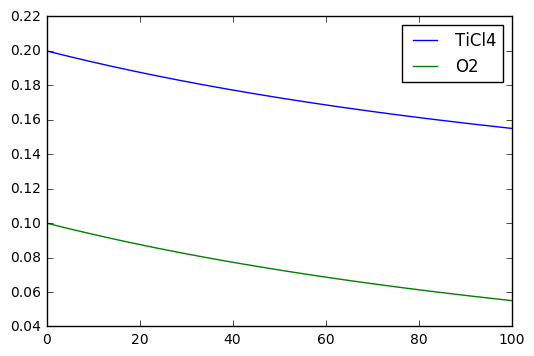

In [91]:
# Simple first order, constant T, constant P

A = 1.4e5 
Ea = 88000 # J/mol
R = 8.314 # J/mol*K
T = 1273 # K

k = A*np.exp(-Ea/(R*T)) * 1e-3

# P will not be defined so that the reactant concentrations can be altered directly

initial_conditions = (0.2, 0.1)

end_time = 100
steps = 10000

def rates(variables, time):
    """
    Return the right hand side of the ODE
    """
    TiCl4, O2 = variables
    rate_TiCl4 = -k*TiCl4*O2
    rate_O2 = -k*TiCl4*O2
    return (rate_TiCl4, rate_O2)

times = np.linspace(0, end_time, steps)
initial_conditions = (0.2, 0.1)
result = odeint(rates, initial_conditions, times)
TiCl4 = result[:,0]             
O2 = result[:,1]
plt.plot(times, TiCl4, label='TiCl4')
plt.plot(times, O2, label='O2')
plt.legend(loc="best") # put the legend at the best location to avoid overlapping things
plt.show()


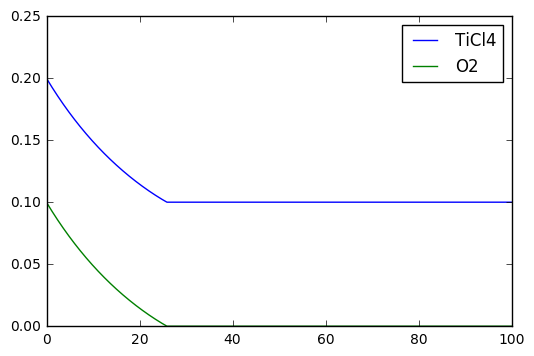

In [90]:
# Actual rate equation, constant T, constant P

A1 = 8.26e4 # s^-1
A2 = 1.4e5 # 
Ea = 88000 # J/mol
R = 8.314 # J/mol*K
T = 1273 # K

k1 = A1*np.exp(-Ea/(R*T)) * 1e-3

k2 = A2*np.exp(-Ea/(R*T)) * 1e-3

# P will not be defined so that the reactant concentrations can be altered directly

initial_conditions = (.2, .1)

end_time = 100
steps = 1000

def rates(variables, time):
    """
    Return the right hand side of the ODE
    """
    
    TiCl4, O2 = variables
    if O2 - (k1+k2*np.sqrt(O2))*TiCl4*end_time/steps <= 0 or np.isclose(0,O2) :
        return (0, 0)
    
    else:
        rate_TiCl4 = -(k1+k2*np.sqrt(O2))*TiCl4
        rate_O2 = -(k1+k2*np.sqrt(O2))*TiCl4
        
        return (rate_TiCl4, rate_O2)

times = np.linspace(0, end_time, steps)
result = odeint(rates, initial_conditions, times)
TiCl4 = result[:,0]             
O2 = result[:,1]
plt.plot(times, TiCl4, label='TiCl4')
plt.plot(times, O2, label='O2')
plt.legend(loc="best") # put the legend at the best location to avoid overlapping things
plt.show()


In [ ]:
# Actual rate equation, non-constant T, constant P
